In [13]:
import satfire as sf
import matplotlib.pyplot as plt
from datetime import datetime as dt, date, timedelta

plt.rcParams['figure.figsize'] = [20, 10]

db = sf.SatfireDatabases()

def make_daily_plot(fire_id, daily_break_hour_z=12, start=None, end=None):
    
    daily_data = db.total_fire_power_by_day(fire_id, daily_break_hour_z)
    
    if start is not None:
        daily_data = tuple((day, data) for day, data in daily_data if day >= start)
    if end is not None:
        daily_data = tuple((day, data) for day, data in daily_data if day <= end)
    if start is None and end is None:
        daily_data = tuple((day, data) for day, data in daily_data)
    
    max_power = max(val for day, data in daily_data for val in data['total power'])
    
    tick_positions = [s for s in range(0, 24*60*60, 3600)]
    
    base = dt(2000, 1, 1, daily_break_hour_z, 0, 0)
    
    def seconds_to_time_str(val):
        tick_time = base + timedelta(seconds=val)
        return tick_time.strftime("%H")
    
    tick_labels = [seconds_to_time_str(v) for v in tick_positions]
    
    f, axs = plt.subplots(len(daily_data), figsize=(20,len(daily_data)*4))
    
    for data, ax in zip(daily_data, axs):
        day, data = data
        ax.plot(data['second of burn day'], data['total power'], label=day)
        ax.set_xticks(tick_positions, tick_labels)
        ax.legend()
        ax.set_ylim((0, max_power))
    

# Dixie Fire, California, 2021

In [14]:
dixie_g16 = db.total_fire_power_time_series(7835968)
dixie_g17 = db.total_fire_power_time_series(1781373)
dixie_g17.keys()

Index(['scan start', 'total power', 'maximum temperature'], dtype='object')

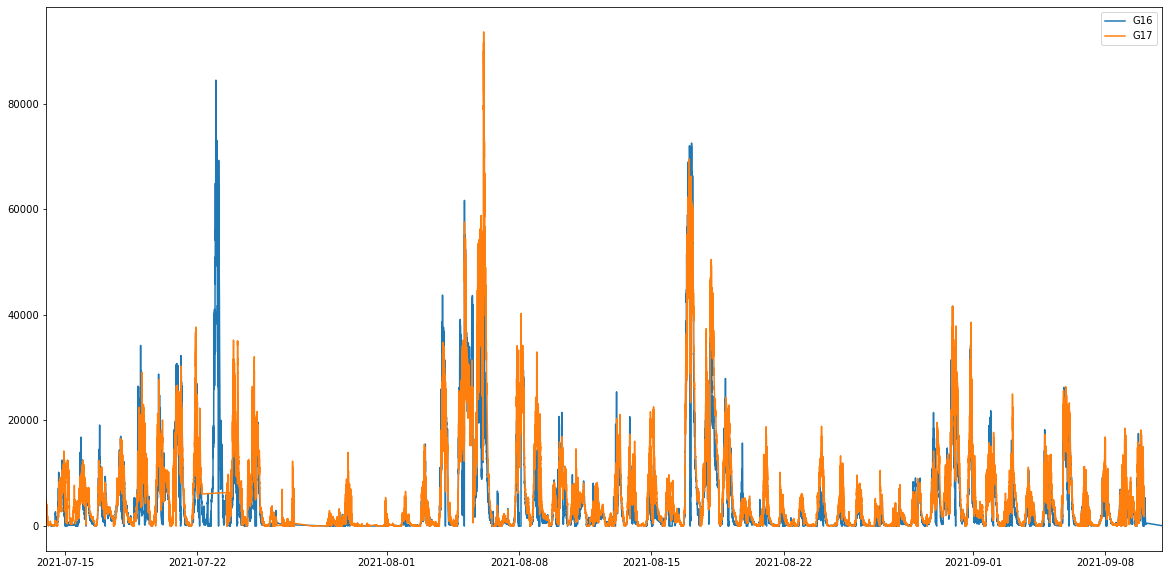

In [15]:
f, ax = plt.subplots()

ax.plot(dixie_g16['scan start'], dixie_g16['total power'], label='G16')
ax.plot(dixie_g17['scan start'], dixie_g17['total power'], label='G17')

ax.set_xlim((dt(2021,7,14), dt(2021,9,11)))

ax.legend()

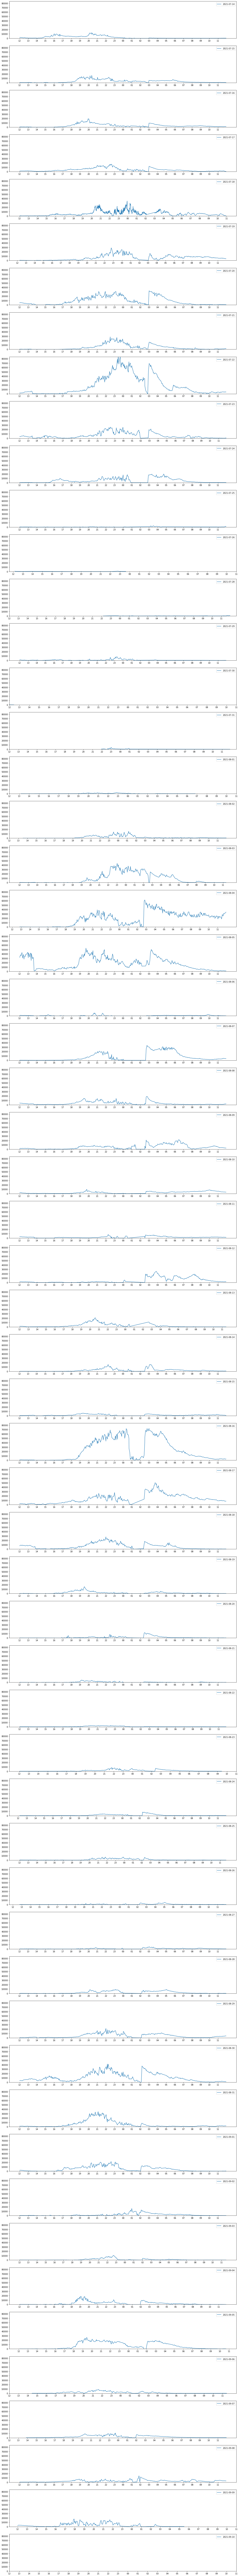

In [16]:
make_daily_plot(7835968, 12, date(2021, 7, 14), date(2021, 9, 11))

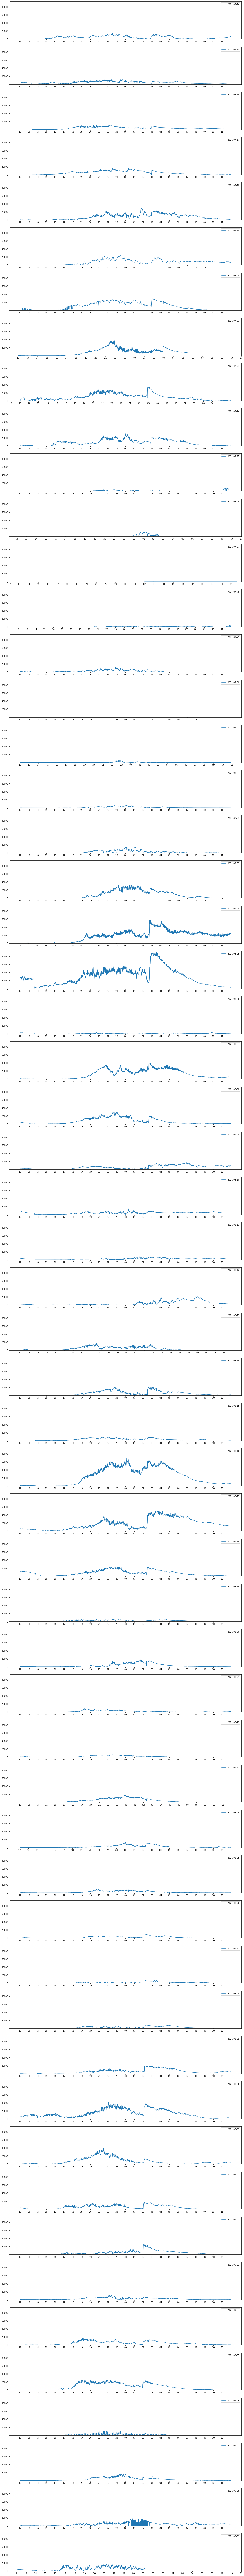

In [17]:
make_daily_plot(1781373, 12, date(2021, 7, 14), date(2021, 9, 11))

# Caldor Fire, California, 2021

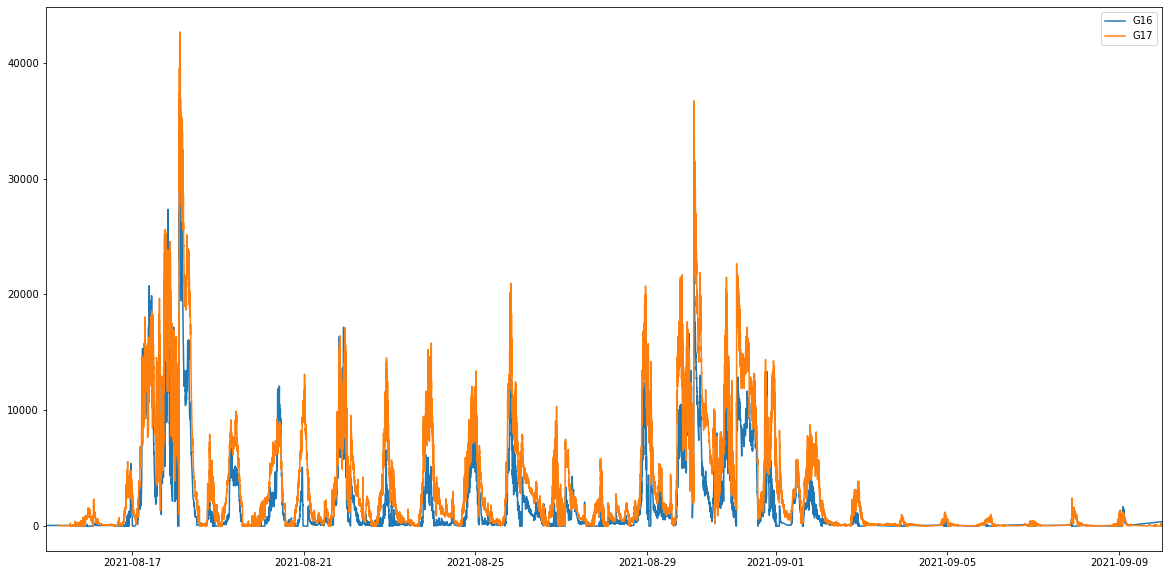

In [6]:
caldor_g16 = db.total_fire_power_time_series(7840373)
caldor_g17 = db.total_fire_power_time_series(1929794)

f, ax = plt.subplots()

ax.plot(caldor_g16['scan start'], caldor_g16['total power'], label='G16')
ax.plot(caldor_g17['scan start'], caldor_g17['total power'], label='G17')

ax.set_xlim((dt(2021,8,15), dt(2021,9,10)))

ax.legend()

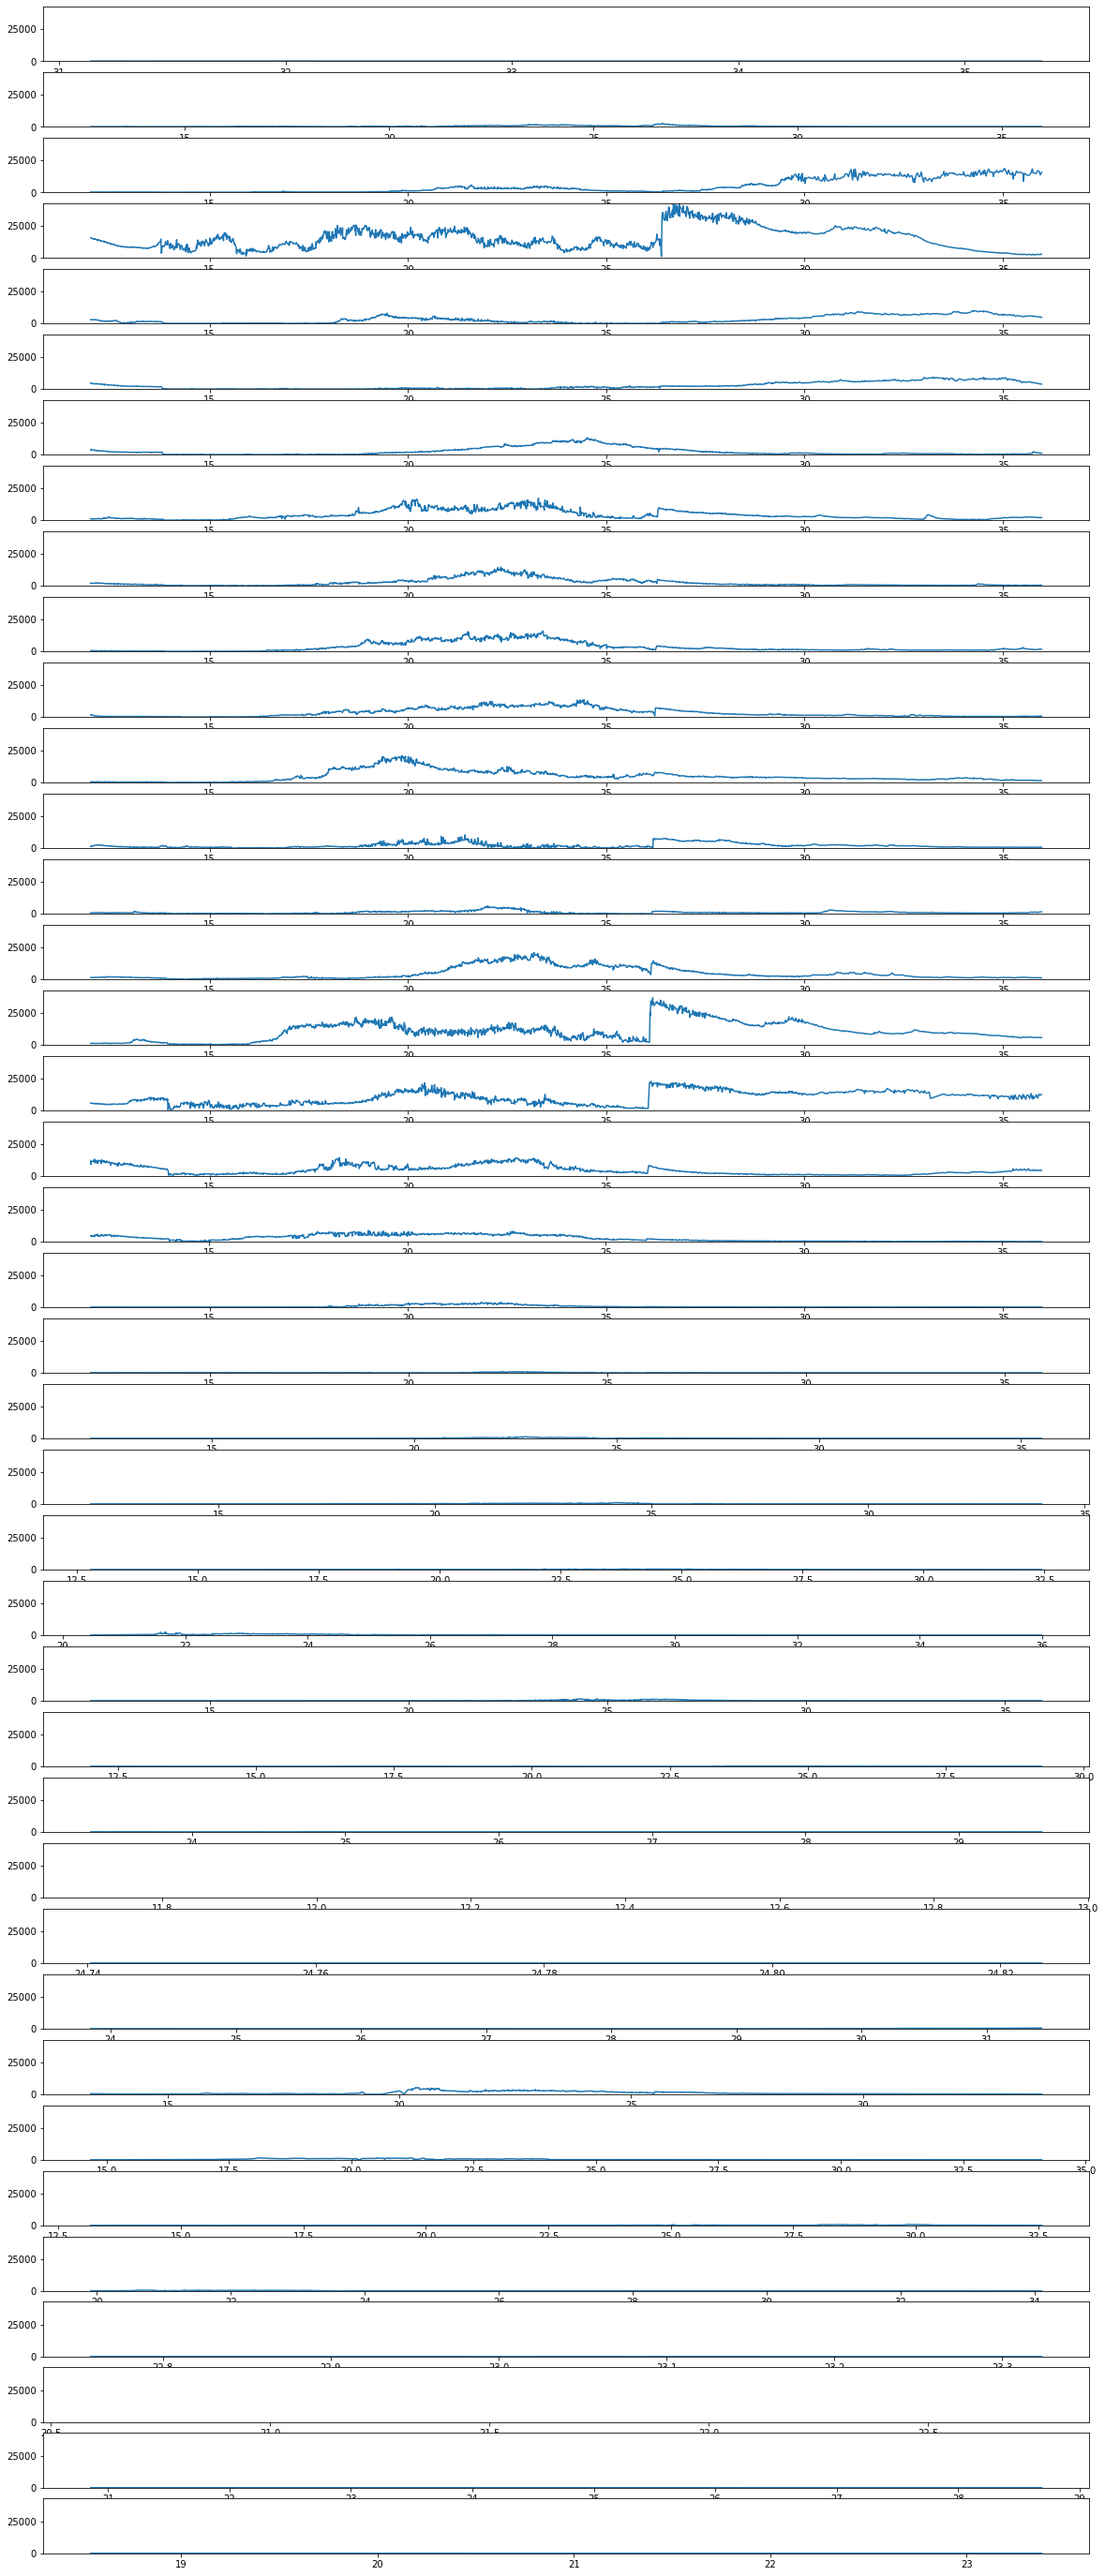

In [7]:
caldor_g17_daily = db.total_fire_power_by_day(1929794)
max_power = caldor_g17_daily.max()['total power'].max()

f, axs = plt.subplots(len(caldor_g17_daily), figsize=(20,50))

for data, ax in zip(caldor_g17_daily, axs):
    day, data = data
    ax.plot(data['second of burn day']/3600+12, data['total power'])
    ax.set_ylim((0, max_power))
    

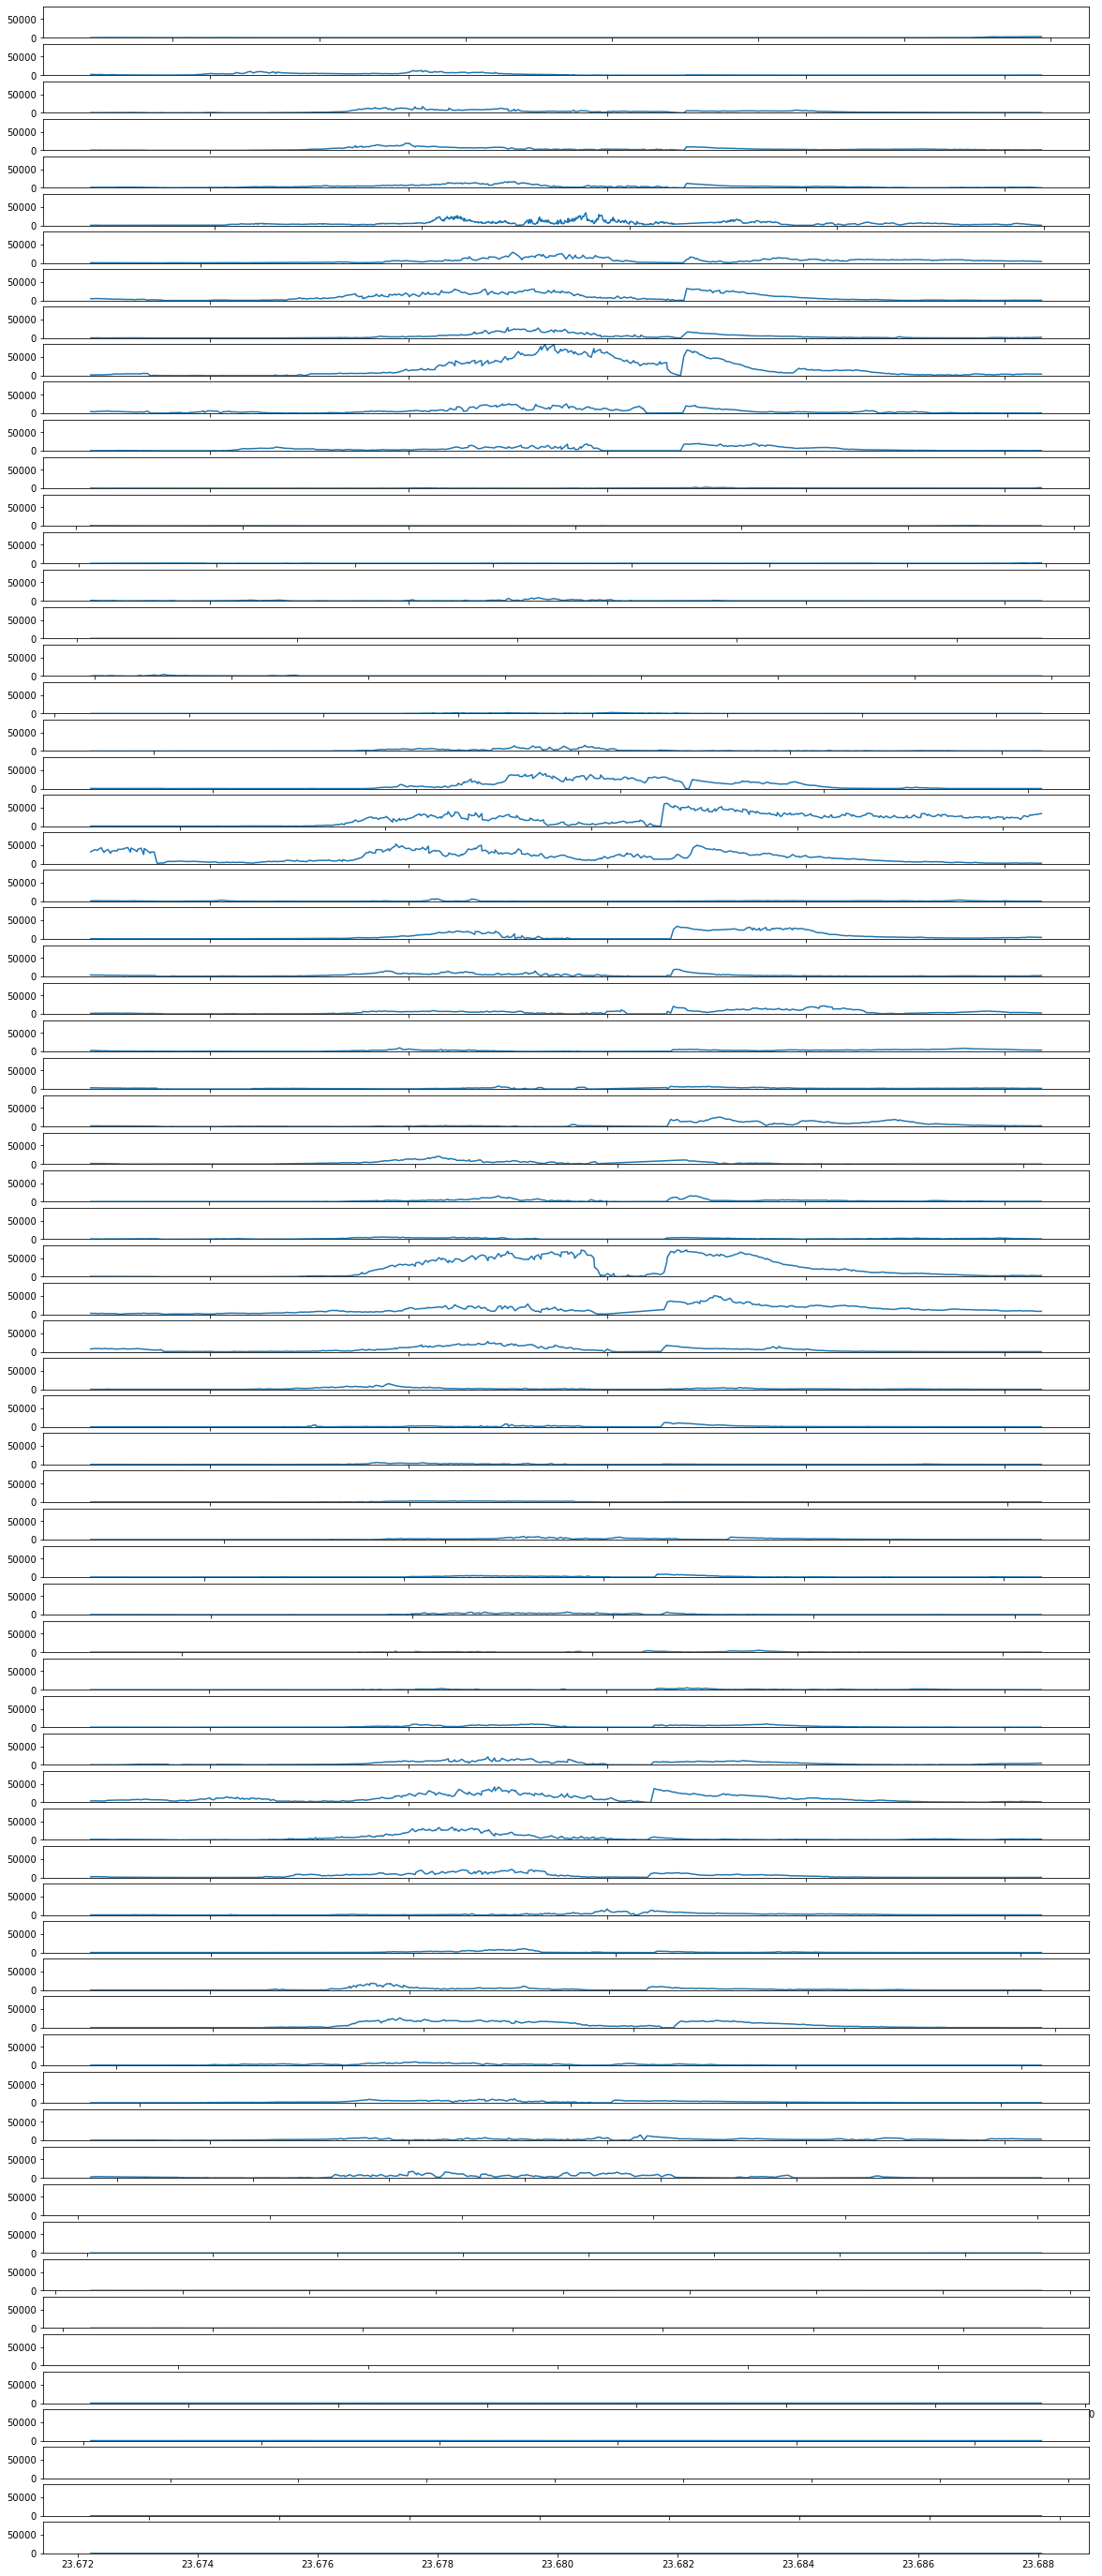

In [8]:
caldor_g16_daily = db.total_fire_power_by_day(7835968)
max_power = caldor_g16_daily.max()['total power'].max()

f, axs = plt.subplots(len(caldor_g16_daily), figsize=(20,50))

for data, ax in zip(caldor_g16_daily, axs):
    day, data = data
    ax.plot(data['second of burn day']/3600+12, data['total power'])
    ax.set_ylim((0, max_power))